In [1]:
import matplotlib.pyplot as plt

import wrap_technote as tn
import dew_gwdata

db = dew_gwdata.sageodata()

In [2]:
plt.style.use("ggplot")

In [3]:
resources = tn.load_gw_resources()

In [4]:
# resources.key.unique()

In [5]:
resource = resources.loc[resources.key == "Barossa_Lower_WL"]

In [6]:
resource

,key,area,area2,aquifer,param,where_1,where_2,shapefile,shapefile_field,shapefile_value,shapefile_epsg,additional_wells
8,Barossa_Lower_WL,Barossa,NaN,Lower,WL,dh.presc_water_res_area_code = 'Barossa Valley',summ.aq_subaq = 'Tomr(Lower)',NaN,NaN,NaN,NaN,NaN


In [7]:
wells = tn.WellSelectionQuery(resource).find_wells("WL", 2015, 2019)

In [8]:
wells

,well_id,dh_no,unit_long,unit_hyphen,obs_no,dh_name,easting,northing,zone,latitude,longitude,aquifer
0,MOR062,53000,662806031,6628-6031,MOR062,MESA,314334.64,6178583.55,54,-34.517691,138.977297,Tomr(Lower)
1,MOR201,61297,662814328,6628-14328,MOR201,MESA - OBS,312604.65,6173313.53,54,-34.564872,138.957300,Tomr(Lower)
2,MOR202,62362,662815393,6628-15393,MOR202,MESA,314698.70,6176262.52,54,-34.538674,138.980756,Tomr(Lower)
3,MOR203,62363,662815394,6628-15394,MOR203,None,314700.67,6176269.55,54,-34.538612,138.980779,Tomr(Lower)
4,MOR206,64601,662901458,6629-1458,MOR206,MESA OBS,316063.67,6183060.53,54,-34.477652,138.997089,Tomr(Lower)
5,MOR071,74610,672801716,6728-1716,MOR071,None,317167.47,6180101.86,54,-34.504514,139.008468,Tomr(Lower)
6,MOR072,74611,672801717,6728-1717,MOR072,MESA,317203.65,6180079.50,54,-34.504722,139.008857,Tomr(Lower)
7,BLV002,76080,672900369,6729-369,BLV002,MESA OBS,320180.63,6188855.55,54,-34.426147,139.043115,Tomr(Lower)
8,BLV005,76082,672900371,6729-371,BLV005,MESA OBS,317232.71,6187394.47,54,-34.438798,139.010739,Tomr(Lower)
9,MOR100,76232,672900521,6729-521,MOR100,MESA OBS,320505.68,6186289.54,54,-34.449331,139.046112,Tomr(Lower)


In [9]:
well = "BRS020"

In [10]:
wls = db.water_levels(db.find_wells(well))
len(wls)

144

In [11]:
wls = tn.filter_wl_observations(wls)
len(wls)

122

In [12]:
seasons = (
    tn.Seasons()
    .append("stressed", "min", end=tn.doy("May 15"))
    .append("recovery", "max", end=tn.doy("Nov 15"))
    .append("stressed", "min")
)

In [14]:
str(seasons)

'S:stressed.1-135:recovery.135-319:stressed.319-366'

In [25]:
wls_ann = tn.analyse_wl_by_seasons(wls, seasons)

In [26]:
cols = ["well_id", "obs_date", "rswl", "season", "year+season"]
wls_ann[cols]

,well_id,obs_date,rswl,season,year+season
0,BRS020,2001-04-06 00:00:00,212.21,stressed,2000-01-stressed
1,BRS020,2002-03-03 00:00:00,212.12,stressed,2001-02-stressed
2,BRS020,2001-11-04 00:00:00,213.72,recovery,2001-recovery
3,BRS020,2003-03-07 00:00:00,211.43,stressed,2002-03-stressed
4,BRS020,2002-10-06 00:00:00,213.00,recovery,2002-recovery
5,BRS020,2004-04-08 00:00:00,211.11,stressed,2003-04-stressed
6,BRS020,2003-10-07 00:00:00,213.03,recovery,2003-recovery
7,BRS020,2005-03-13 00:00:00,212.09,stressed,2004-05-stressed
8,BRS020,2004-11-12 00:00:00,213.33,recovery,2004-recovery
9,BRS020,2006-04-12 00:00:00,211.47,stressed,2005-06-stressed


In [27]:
wls_rec = wls_ann.loc[wls_ann.season == "recovery"]

In [28]:
wls_rec[cols]

,well_id,obs_date,rswl,season,year+season
2,BRS020,2001-11-04 00:00:00,213.72,recovery,2001-recovery
4,BRS020,2002-10-06 00:00:00,213.00,recovery,2002-recovery
6,BRS020,2003-10-07 00:00:00,213.03,recovery,2003-recovery
8,BRS020,2004-11-12 00:00:00,213.33,recovery,2004-recovery
10,BRS020,2005-11-14 00:00:00,213.31,recovery,2005-recovery
12,BRS020,2006-09-13 00:00:00,212.90,recovery,2006-recovery
14,BRS020,2007-07-15 00:00:00,212.48,recovery,2007-recovery
16,BRS020,2008-10-07 00:00:00,211.95,recovery,2008-recovery
18,BRS020,2009-10-13 00:00:00,213.14,recovery,2009-recovery
20,BRS020,2010-08-13 00:00:00,213.55,recovery,2010-recovery


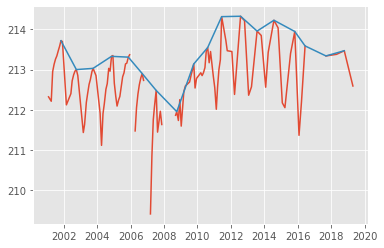

In [29]:
plt.plot(wls.obs_date, wls.rswl)
plt.plot(wls_rec.obs_date, wls_rec.rswl)

In [30]:
wls_rec["rswl_percentile"] = wls_rec.rswl.rank(pct=True) * 100

c:\devapps\python\anaconda3-64\envs\gw\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
wls_rec["rswl_bom_class"] = wls_rec.rswl_percentile.transform(
    tn.percentile_to_bom_class
)

c:\devapps\python\anaconda3-64\envs\gw\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x18f26f5d8d0>,
 'cax': None,
 'cbar': <matplotlib.colorbar.Colorbar at 0x18f26fd7780>}

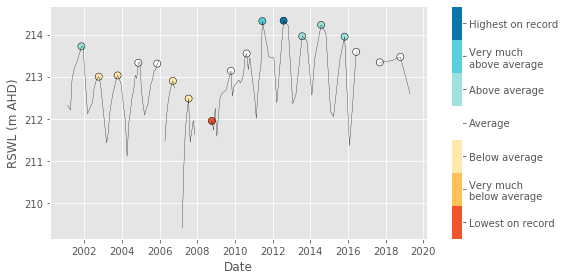

In [36]:
tn.plot_wl_bom_classes(wls_rec, wls, fig=plt.figure(figsize=(8, 4)))